<a href="https://colab.research.google.com/github/kurtsenol/machine-learning/blob/master/TopicModeling/Methodology/Model_30_no_freq_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install pyLDAvis

In [1]:
!pip3 install pickle5

     |████████████████████████████████| 133kB 5.5MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219265 sha256=160d96d135803953d40d396749fa77a3fd6dfcfb8bca573c1d796062fc2b93eb
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [2]:
import os
import numpy as np
import pandas as pd
import pickle5 as pickle
from pprint import pprint

In [4]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
# import pyLDAvis
# import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt

In [5]:
id2word = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/TopicModeling/Methodology/id2word_no_freq.pkl", "rb"))
corpus = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/TopicModeling/Methodology/corpus_no_freq.pkl", "rb"))
data_ready = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/TopicModeling/Methodology/data_ready_no_freq.pkl", "rb"))

In [6]:
# Filter out words that occur less than 20 documents, or more than 60% of the documents.
id2word.filter_extremes(no_below=5, no_above=0.6)

print('Total Vocabulary Size:', len(id2word))

Total Vocabulary Size: 6040


In [7]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

### Build the Topic Model

In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip

In [ ]:
!unzip mallet-2.0.8.zip

In [10]:
mallet_path = '/content/mallet-2.0.8/bin/mallet'  

In [11]:
num_topics=30

In [12]:
alpha=5/num_topics

In [13]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, iterations=2000, alpha=alpha)

Below you can find the 30 topics formed by the model. For each topic there are 10 terms and their relative weights next to it in descending order. 

In [14]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False, num_topics=num_topics))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_ready, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('manager', 0.07173506007177406),
   ('hotel', 0.06362146980808238),
   ('management', 0.028358558277422376),
   ('interview', 0.023755656108597284),
   ('industry', 0.011936339522546418),
   ('work', 0.010376033702605711),
   ('conduct', 0.010102980184116086),
   ('level', 0.008893743173662037),
   ('company', 0.00869870494616945),
   ('respondent', 0.008503666718676861)]),
 (1,
  [('wine', 0.04368578057673185),
   ('chinese', 0.041498176997016904),
   ('family', 0.026052369903878023),
   ('korean', 0.02466025853496851),
   ('group', 0.02267152800795492),
   ('culture', 0.01690420947961551),
   ('travel', 0.015114352005303281),
   ('country', 0.013987404706662248),
   ('child', 0.012330129267484256),
   ('cultural', 0.012131256214782896)]),
 (2,
  [('online', 0.03971179624664879),
   ('website', 0.038036193029490614),
   ('host', 0.03155719392314567),
   ('information', 0.02993744414655943),
   ('user', 0.024352100089365506),
   ('airbnb', 0.019772117962466487),
   ('list', 0.

In [15]:
# pickle.dump(ldamallet, open("/content/drive/MyDrive/Colab Notebooks/TopicModeling/Methodology/model_30_no_freq_2.pkl", "wb"))

In [16]:
ldamallet = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/TopicModeling/Methodology/model_30_no_freq_2.pkl", "rb"))

In [17]:
tm_results = ldamallet[corpus]

In [18]:
# pickle.dump(tm_results, open("/content/drive/MyDrive/Colab Notebooks/TopicModeling/Methodology/tm_results_30_no_freq_2.pkl", "wb"))

In [19]:
tm_results = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/TopicModeling/Methodology/tm_results_30_no_freq_2.pkl", "rb"))

In [20]:
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0] for topics in tm_results]

In [21]:
topics = [[(term, round(wt, 3)) for term, wt in ldamallet.show_topic(n, topn=10)] for n in range(0, ldamallet.num_topics)]


Below is the Topic-Term matrix shows 10 terms that forms each topic.   

In [22]:
topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns = ['Term'+str(i) for i in range(1, 11)],
                         index=['Topic '+str(t) for t in range(1, ldamallet.num_topics+1)]).T
topics_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25,Topic 26,Topic 27,Topic 28,Topic 29,Topic 30
Term1,manager,wine,online,review,firm,hotel,brand,event,interview,article,restaurant,food,hotel,tourism,price,employee,service,participant,respondent,work,questionnaire,casino,model,effect,company,return,employee,cost,model,model
Term2,hotel,chinese,website,rating,year,guest,customer,social,researcher,journal,service,menu,performance,tourist,hotel,level,customer,scenario,survey,respondent,survey,game,input,significant,environmental,risk,work,activity,time,construct
Term3,management,family,host,word,model,stay,service,network,code,author,dining,restaurant,room,destination,room,team,failure,condition,questionnaire,hospitality,respondent,table,output,high,innovation,market,questionnaire,table,effect,factor
Term4,interview,korean,information,negative,asset,room,quality,festival,process,paper,food,water,chain,number,rate,manager,restaurant,subject,response,percent,question,resort,efficiency,difference,manager,event,hotel,exhibit,regression,measurement
Term5,industry,group,user,online,performance,attribute,satisfaction,relationship,question,hospitality,customer,dish,number,country,booking,performance,server,experiment,question,industry,group,member,function,support,business,change,respondent,customer,estimate,table
Term6,work,culture,airbnb,customer,size,service,experience,community,experience,tourism,quality,order,property,local,book,group,emotion,design,participant,student,factor,gaming,number,table,employee,stock,survey,time,period,variance
Term7,conduct,travel,list,positive,financial,level,loyalty,business,approach,identify,consumer,healthy,year,visitor,high,work,experience,respondent,measurement,year,expert,club,method,condition,practice,rate,time,hour,coefficient,reliability
Term8,level,country,number,hotel,control,quality,relationship,activity,participant,keyword,experience,information,size,travel,table,service,table,manipulation,cent,career,conduct,player,score,regression,performance,period,year,number,demand,method
Term9,company,child,post,information,ratio,green,consumer,exhibition,qualitative,network,respondent,number,market,region,time,individual,recovery,perceive,construct,participant,section,reward,weight,interaction,industry,index,supervisor,level,number,dimension
Term10,respondent,cultural,travel,term,effect,travel,company,local,identify,review,attribute,meal,average,city,online,organizational,behavior,question,experience,level,identify,play,represent,level,management,crisis,cent,disability,price,assess


In [23]:
pd.set_option('display.max_colwidth', -1)

topics_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics], columns = ['Terms per Topic'],
                         index=['Topic'+str(t) for t in range(1, ldamallet.num_topics+1)] )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [24]:
topics_df

,Terms per Topic
Topic1,"manager, hotel, management, interview, industry, work, conduct, level, company, respondent"
Topic2,"wine, chinese, family, korean, group, culture, travel, country, child, cultural"
Topic3,"online, website, host, information, user, airbnb, list, number, post, travel"
Topic4,"review, rating, word, negative, online, customer, positive, hotel, information, term"
Topic5,"firm, year, model, asset, performance, size, financial, control, ratio, effect"
Topic6,"hotel, guest, stay, room, attribute, service, level, quality, green, travel"
Topic7,"brand, customer, service, quality, satisfaction, experience, loyalty, relationship, consumer, company"
Topic8,"event, social, network, festival, relationship, community, business, activity, exhibition, local"
Topic9,"interview, researcher, code, process, question, experience, approach, participant, qualitative, identify"
Topic10,"article, journal, author, paper, hospitality, tourism, identify, keyword, network, review"


### WordClouds

In [25]:
from wordcloud import WordCloud

In [26]:
wc = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [27]:
plt.rcParams['figure.figsize'] = [20, 15]

Below is the word clouds, one for each topic. The font sizes of words show their relative weights in the topic.

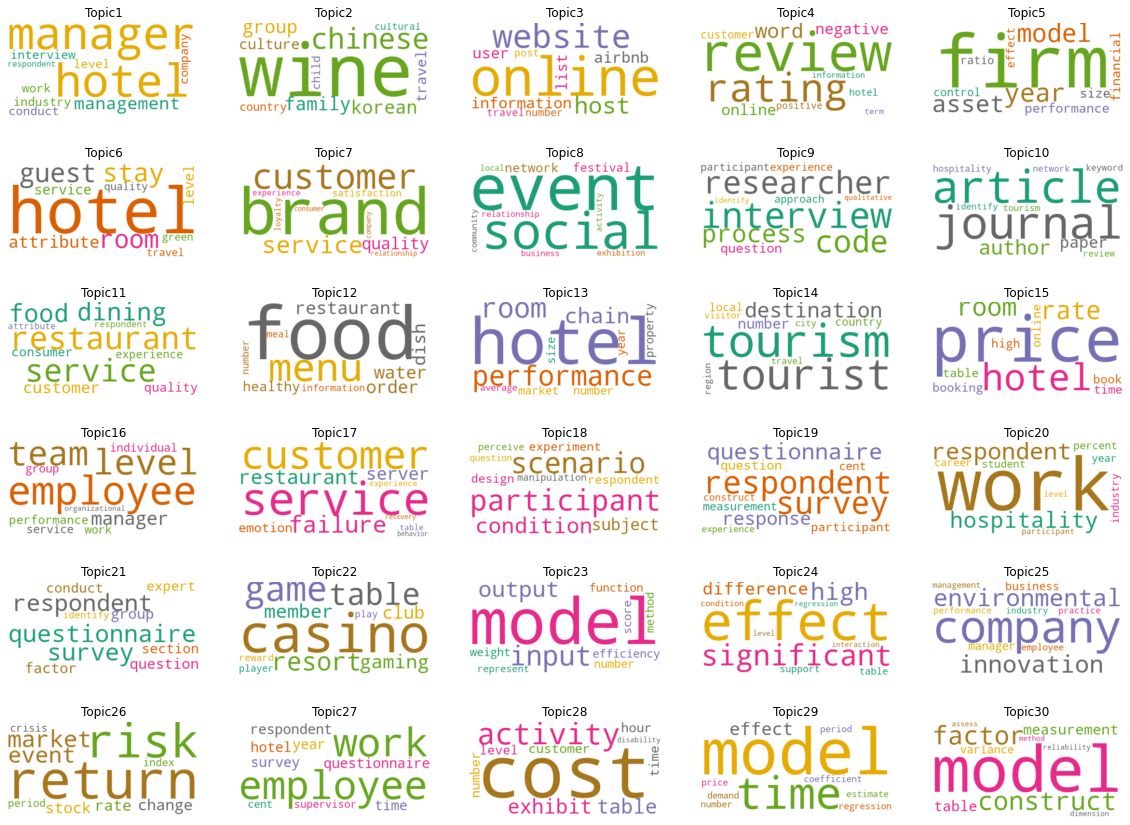

In [28]:
# Create subplots for each comedian
i=0
for i in range(num_topics):

    wc.generate(text=topics_df["Terms per Topic"][i])
    
    plt.subplot(6, 5, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(topics_df.index[i])

plt.show()

In [29]:
# import pyLDAvis.gensim as gensimvis
# import pyLDAvis

In [30]:
# from gensim.models.ldamodel import LdaModel
# def convertldaGenToldaMallet(mallet_model):
#     model_gensim = LdaModel(
#         id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
#         alpha=mallet_model.alpha) # original function has 'eta=0' argument
#     model_gensim.state.sstats[...] = mallet_model.wordtopics
#     model_gensim.sync_state()
#     return model_gensim

In [31]:
# new_lda = convertldaGenToldaMallet(ldamallet)

In [32]:
# vis_data = gensimvis.prepare(new_lda, corpus, id2word, sort_topics=False, n_jobs=1)
# pyLDAvis.display(vis_data)